## Introduction

##### $\rightarrow$ Brief introduction to the purpose of this notebook.

- The purpose of this notebook is to answer the question of whether it rains more in Seattle or New York City. Using data from the National Centers for Environmental Information NOAA Climate Data Online search tool, we will create plots that we can interpret to answer the question.

## Import libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

##### $\rightarrow$ Load the clean data set from Github.

In [53]:
df = pd.read_csv("https://raw.githubusercontent.com/nguyenntina/Seattle-Weather/main/clean_seattle_nyc_weather.csv")

##### $\rightarrow$ Review the contents of the data set.

In [54]:
df.head()

,date,city,precipitation
0,2020-01-01,NYC,0.00
1,2020-01-02,NYC,0.00
2,2020-01-03,NYC,0.13
3,2020-01-04,NYC,0.16
4,2020-01-05,NYC,0.00


In [55]:
df.describe()

,precipitation
count,2922.000000
mean,0.112064
std,0.304695
min,0.000000
25%,0.000000
50%,0.000000
75%,0.080000
max,8.050000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2922 non-null   object 
 1   city           2922 non-null   object 
 2   precipitation  2922 non-null   float64
dtypes: float64(1), object(2)
memory usage: 68.6+ KB


## State your questions

The overall problem is to compare how much it rains in Seattle and New York City. To answer this general problem, we will need to ask specific questions about the data.


##### $\rightarrow$ Some questions to explore can be:
- What city has more rainy days?
- How many inches of rain does each city get?
- Does Seattle or NYC experience heavier rain?

## Analysis

Perform analyses necessary to answer the questions.

In [57]:
df["date"] = pd.to_datetime(df["date"])

In [58]:
df['month'] = pd.DatetimeIndex(df['date']).month
df["year"] = df["date"].dt.year

In [59]:
df.head()

,date,city,precipitation,month,year
0,2020-01-01,NYC,0.00,1,2020
1,2020-01-02,NYC,0.00,1,2020
2,2020-01-03,NYC,0.13,1,2020
3,2020-01-04,NYC,0.16,1,2020
4,2020-01-05,NYC,0.00,1,2020


In [60]:
df.tail()

,date,city,precipitation,month,year
2917,2023-12-27,SEA,0.10,12,2023
2918,2023-12-28,SEA,0.05,12,2023
2919,2023-12-29,SEA,0.00,12,2023
2920,2023-12-30,SEA,0.10,12,2023
2921,2023-12-31,SEA,0.00,12,2023


The following plot will show how many inches of of rain each city get throughout 2021 to 2024.

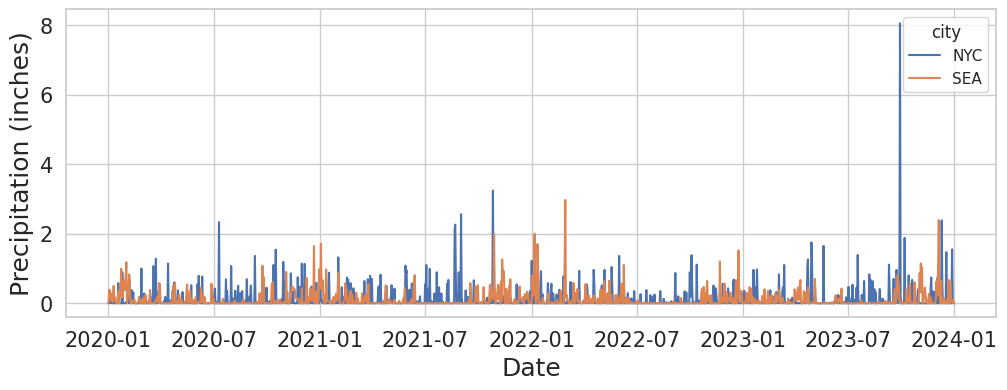

In [61]:
plt.figure(figsize=(12,4))
sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.tick_params(labelsize=15);

One thing we see pop out is that we have a high point where NYC got over 8 inches of rain in Fall of 2023. This does differ quite a lot from the rest of the data.



---



We want to see how many rainy days there are from 2020 to 2023 for both cities.

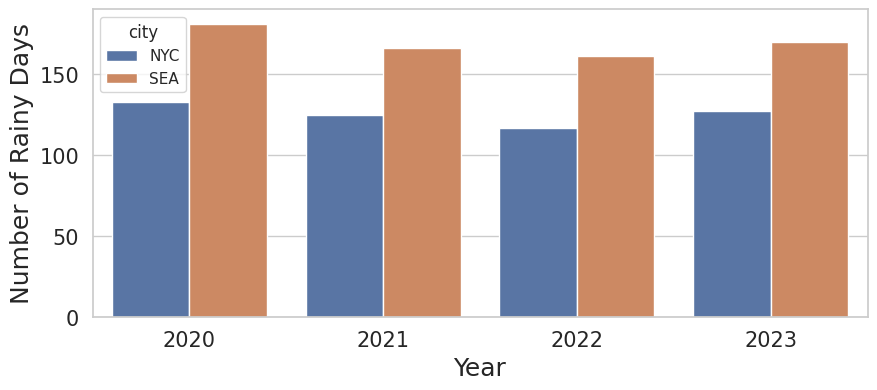

In [62]:
df['rain'] = df['precipitation'] > 0
df2 = df.groupby(['city', 'year'])['rain'].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=df2, x='year', y='rain', hue='city')

plt.xlabel('Year', fontsize=18)
plt.ylabel('Number of Rainy Days', fontsize=18)
plt.tick_params(labelsize=15);

From the plot, we can see that for all four years, Seattle had more rainy days than NYC.



---



The following will show how many inches of rain both cities gets each year.

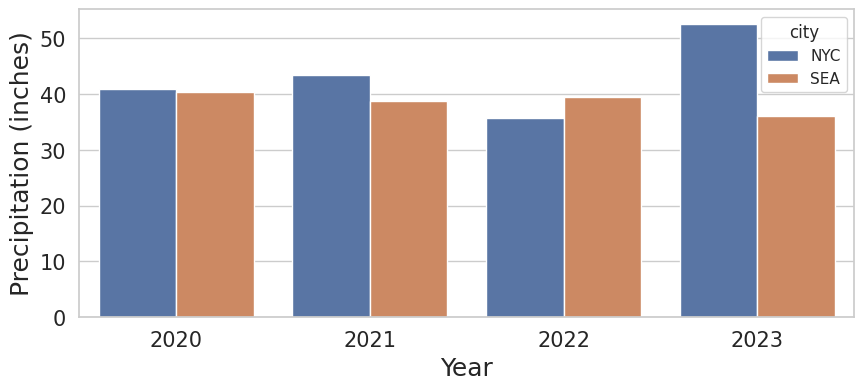

In [63]:
df2 = df.groupby(['city', 'year'])['precipitation'].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=df2, x='year', y='precipitation', hue='city')

plt.xlabel('Year', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.tick_params(labelsize=15);

From the plot, we can see that except for 2022, NYC gets more inches of rain than Seattle.



---



The following will show average inches of daily precipitation for each month for both cities.

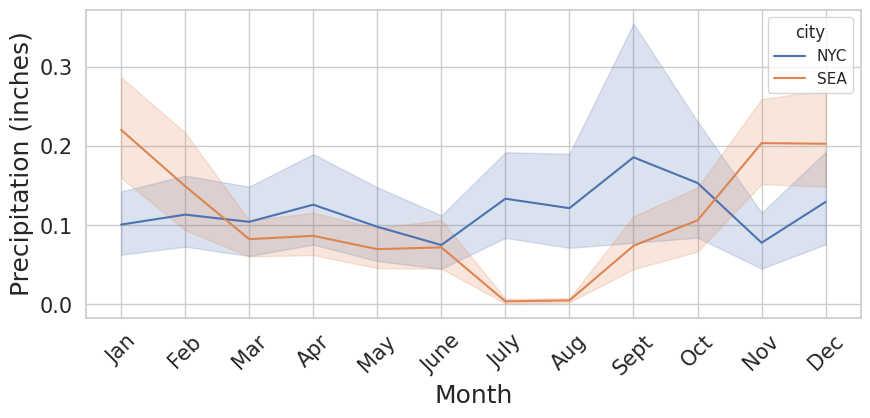

In [64]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.xticks(ticks=np.arange(12)+1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tick_params(labelsize=15);

From the line plot above, we can see that NYC receives more precipitation than Seattle from the months of March to October.



---



We want to see the intensity and frequency of precipitation that occurs in both cities.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'log(rain)')

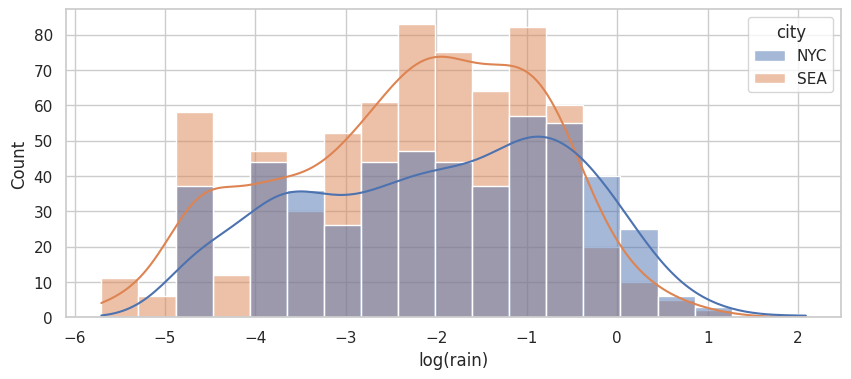

In [65]:
df["log_precip"] = np.log(df["precipitation"])
plt.figure(figsize=(10, 4))
h = sns.histplot(data=df, x="log_precip", hue="city", bins="auto", kde=True)
plt.xlabel("log(rain)")

Using the log scale, we can better see how both city experience rain. The left side of the plot shows frequency of days with low precipitation and the right side shows high precipitation. We can see that NYC's bars towards the right side are longer than Seattle's bar showing they experience more days with heavier rainfall.

### Results for communication assignment

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

## Conclusion

From our analysis, we can conclude that NYC receives more rain throughout the year, but Seattle has more rainy day.